---
title: Exploratory Data Analysis
---

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import polars as pl
import seaborn as sns

sns.set_theme(context="paper", style="ticks", palette="deep", color_codes=True)
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 300

### EDA of match_results 

In [2]:
match_results = pl.read_csv(
    Path("./../data/match_results.csv"),
).cast(
    {
        "DaysInPost": pl.Int64,
        "Goals": pl.Int64,
        "Date": pl.Date,
    }
)

match_results.head()

League,Country,Date,Team,Goals,Result,isHome,HeadCoach,DaysInPost
str,str,date,str,i64,str,bool,str,i64
"""Premier League""","""England""",2014-08-16,"""Manchester Utd""",1,"""loss""",true,"""Louis van Gaal""",33
"""Premier League""","""England""",2014-08-16,"""Arsenal""",2,"""win""",true,"""Arsène Wenger""",6528
"""Premier League""","""England""",2014-08-17,"""Liverpool""",2,"""win""",true,"""Brendan Rodgers""",777
"""Premier League""","""England""",2014-08-17,"""Newcastle Utd""",0,"""loss""",true,"""Alan Pardew""",1347
"""Premier League""","""England""",2014-11-01,"""Newcastle Utd""",1,"""win""",true,"""Alan Pardew""",1423


In [3]:
head_coach = pl.read_csv(Path("./../data/head_coach.csv")).cast(
    {"Appointed": pl.Date, "EndDate": pl.Date}
)
head_coach.head()

Team,League,Country,HeadCoach,Appointed,EndDate,Tenure,Matches,Wins,Draws,Losses,AppointmentNumber
str,str,str,str,date,date,i64,i64,i64,i64,i64,i64
"""Granada""","""LaLiga""","""Spain""","""Abel Resino""",2015-01-19,2015-05-01,102,15,2,5,8,1
"""Köln""","""Bundesliga""","""Germany""","""Achim Beierlorzer""",2019-07-01,2019-11-09,131,13,3,1,9,1
"""Mainz 05""","""Bundesliga""","""Germany""","""Achim Beierlorzer""",2019-11-18,2020-09-28,315,26,9,4,13,2
"""Eint Frankfurt""","""Bundesliga""","""Germany""","""Adi Hütter""",2018-07-01,2021-06-30,1095,141,67,31,43,1
"""M'Gladbach""","""Bundesliga""","""Germany""","""Adi Hütter""",2021-07-01,2022-06-30,364,37,14,9,14,2


In [4]:
first_season = match_results.get_column("Date").dt.year().min() + 1
last_season = match_results.get_column("Date").dt.year().max()
leagues = ", ".join(match_results.get_column("League").unique())
n_match = round(len(match_results) / 2)
n_team = match_results.get_column("Team").n_unique()
n_team_no_coach = (
    match_results.group_by("Team")
    .agg(pl.col("HeadCoach").is_null().all().alias("all_null"))
    .filter(pl.col("all_null"))
    .height
)
perc_match_no_coach = match_results.get_column("HeadCoach").is_null().sum() / len(
    match_results
)
n_coach = head_coach.get_column("HeadCoach").n_unique()
n_appointments = len(head_coach)

Nous avons collecté les résultats des matchs et les mandats des entraîneurs sportif chef de la première division masculine de football pour les saisons {eval}`first_season` - {eval}`last_season` et pour les ligues suivantes : {eval}`leagues`.

Cela correspond à un total de {eval}`n_match` matchs joués par {eval}`n_team` équipes.
Parmi ces {eval}`n_team` équipes, {eval}`n_team_no_coach` équipes n'ont pas d'information sur les mandats des entraîneurs chefs pour tout ou partie des saisons 2015 à 2023. En proportion de match c'est {eval}`f'{perc_match_no_coach:.2%}'` des matchs qui ne comportent pas d'information sur l'entraîneur chef.

Les données des mandats des entraîneurs sportifs contiennent {eval}`n_appointments` mandat d'entraîneurs chefs parmi {eval}`n_coach` entraîneurs uniques.

In [5]:
# | label: data_summary

match_summary = (
    match_results.group_by(["League", "Country"])
    .agg(
        [
            pl.col("Team").n_unique().alias("Number of Teams"),
            pl.col("Date").len().alias("Number of Matches"),
            (
                (pl.col("HeadCoach").is_null().sum() / pl.col("HeadCoach").len() * 100)
                .round(2)
                .cast(pl.String)
                + "%"
            ).alias("Percentage of Matches without Head Coach"),
        ]
    )
    .sort("Number of Matches", descending=True)
)

match_summary

League,Country,Number of Teams,Number of Matches,Percentage of Matches without Head Coach
str,str,u32,u32,str
"""La Liga""","""Spain""",31,6145,"""48.23%"""
"""Ligue 1""","""France""",32,6043,"""51.98%"""
"""Serie A""","""Italy""",34,5927,"""34.64%"""
"""Premier League""","""England""",33,5582,"""53.78%"""
"""Bundesliga""","""Germany""",31,5026,"""38.32%"""


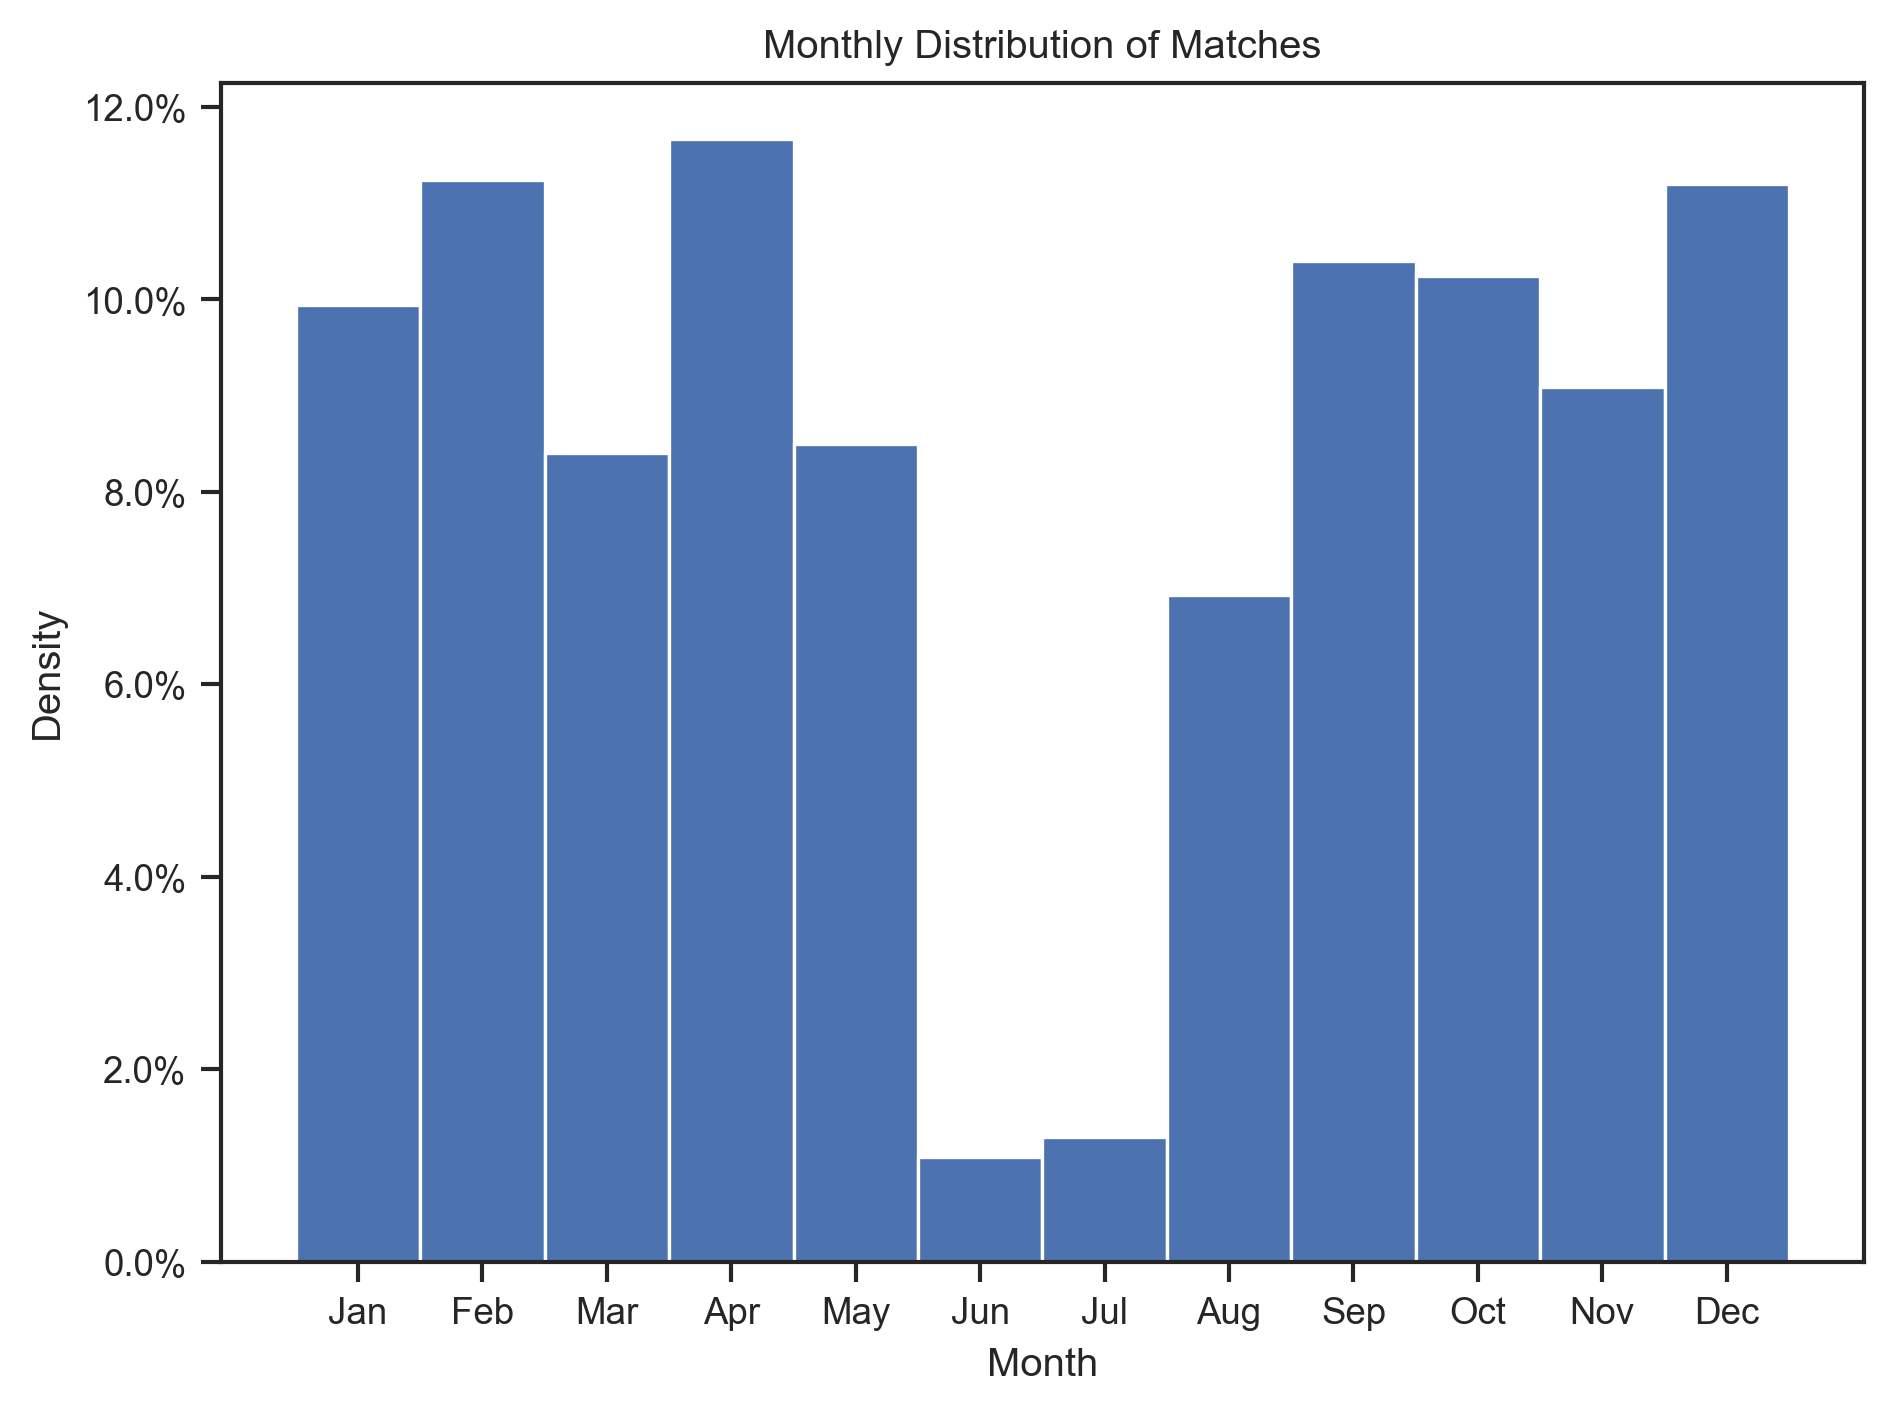

In [6]:
# | label: match_distribution

# Plot distribution of match
plt.figure()
sns.histplot(
    match_results.get_column("Date").dt.month(),
    stat="density",
    discrete=True,
    alpha=1,
)
plt.title("Monthly Distribution of Matches")
plt.xlabel("Month")
plt.ylabel("Density")
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.gca().set_xticks(range(1, 13))
plt.gca().set_xticklabels(
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
plt.show()

### Effet du jeu à domicile ou à l'extérieur sur la performance des équipes

In [7]:
mean_home_goals = match_results.filter(pl.col("isHome")).get_column("Goals").mean()
mean_away_goals = match_results.filter(~pl.col("isHome")).get_column("Goals").mean()
diff_goal_perc = (mean_home_goals - mean_away_goals) / mean_away_goals

L’équipe qui joue à domicile marque en moyenne {eval}`f'{home_goal:.2f}'` but contre {eval}`f'{away_goal:.2f}'` but pour l’équipe jouant à l’extérieur ({eval}`f'{diff_goal_perc:.2%}'` moins de buts).

In [8]:
# | label: venue_effect

match_result_home_away = (
    match_results.group_by(["isHome", "Result"])
    .len()
    .with_columns(proportion=pl.col("len") / pl.col("len").sum().over("isHome"))
    .select(
        pl.col("isHome")
        .replace_strict({True: "Home", False: "Away"})
        .alias("Team venue"),
        pl.col("Result").str.to_titlecase(),
        pl.format("{} %", (pl.col("proportion") * 100).round(1)).alias(
            "Proportion (%)"
        ),
    )
    .sort("Team venue", "Result", descending=True)
)

match_result_home_away

Team venue,Result,Proportion (%)
str,str,str
"""Home""","""Win""","""43.3 %"""
"""Home""","""Loss""","""31.5 %"""
"""Home""","""Draw""","""25.2 %"""
"""Away""","""Win""","""28.9 %"""
"""Away""","""Loss""","""45.8 %"""
"""Away""","""Draw""","""25.3 %"""


In [10]:
home_stats = match_result_home_away.filter(pl.col("Team venue") == "Home").get_column(
    "Proportion (%)"
)
away_stats = match_result_home_away.filter(pl.col("Team venue") == "Away").get_column(
    "Proportion (%)"
)

perc_home_win = home_stats.item(0)
perc_home_loss = home_stats.item(1)
perc_away_win = away_stats.item(0)
perc_away_loss = away_stats.item(1)
perc_draw = home_stats.item(2)

Les équipes jouant à domicile remportent {eval}`f'{perc_home_win}'` de leurs matchs contre {eval}`f'{perc_away_win}'` pour les équipes jouant à l'extérieur. Les équipes perdent {eval}`f'{perc_home_loss}'` de leurs matchs contre {eval}`f'{perc_away_loss}'` pour les équipes jouant à l'extérieur. Les matchs nuls représentent {eval}`f'{perc_draw}'` des matchs.